<a href="https://colab.research.google.com/github/jeev-data-wiz/Password-Strength-/blob/main/NLP_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import sqlite3

In [3]:
con=sqlite3.connect('/content/password_data.sqlite')

In [4]:
df=pd.read_sql_query('SELECT * FROM Users', con)

In [5]:
df.shape

(100000, 3)

In [6]:
df.head(5)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [7]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
df.isna().any()

index       False
password    False
strength    False
dtype: bool

In [9]:
df.isnull().sum()

index       0
password    0
strength    0
dtype: int64

In [10]:
df.dropna

<bound method DataFrame.dropna of        index                 password  strength
0          0                zxe870819         1
1          1             xw46454nr23l         1
2          2                soporte13         1
3          3  accounts6000webhost.com         2
4          4                 c443balg         1
...      ...                      ...       ...
99995  99995               obejofi215         1
99996  99996               fmiopvxb64         1
99997  99997                czvrbun38         1
99998  99998                mymyxe430         1
99999  99999              glqjhkxb467         1

[100000 rows x 3 columns]>

In [11]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [12]:
df.drop(["index"] , axis=1 , inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().any()

password    False
strength    False
dtype: bool

In [15]:
df.isnull().any().sum()

0

In [16]:
df.dtypes

password    object
strength     int64
dtype: object

In [17]:
df["strength"].unique()

array([1, 2, 0])

In [18]:
df[df['password'].str.isnumeric()].shape

(26, 2)

In [19]:
df[df['password'].str.isupper()].shape

(1506, 2)

In [20]:
df[df['password'].str.isalpha()].shape

(50, 2)

In [21]:
df[df['password'].str.isalnum()].shape

(97203, 2)

In [22]:
df[df['password'].str.istitle()].shape

(932, 2)

In [23]:
import string


In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def find_semantics (row) :
 for char in row:
  if char in string.punctuation:
      return 1
  else :
    pass

In [26]:
df[df['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [27]:
def freq_upper(row):
    return len([char for char in row if char.isupper()])/len(row)

In [28]:
def freq_lower(row) :
    return len([char for char in row if char.islower()])/len(row)

In [29]:
def freq_num(row) :
  return len([char for char in row if char.isnumeric()])/len(row)

In [30]:
df["uppercase_freq"] = np.round(df["password"].apply(freq_upper) , 3)
df["lowercase_freq"] = np.round(df["password"].apply(freq_lower) , 3)
df["numeral_freq"] = np.round(df["password"].apply(freq_num) , 3)


In [31]:
def freq_special(row):
  spl=[]
  for char in row:
    if not char.isalpha() and not char.isdigit():
      spl.append(char)
  return len(spl)

In [32]:
df["special_char_freq"] = np.round(df["password"].apply(freq_special) , 3)

In [33]:
df['length']=df['password'].str.len()

In [34]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'numeral_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(df[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


numeral_freq
         numeral_freq                        
                  min    max      mean median
strength                                  

In [35]:
df.columns

Index(['password', 'strength', 'uppercase_freq', 'lowercase_freq',
       'numeral_freq', 'special_char_freq', 'length'],
      dtype='object')

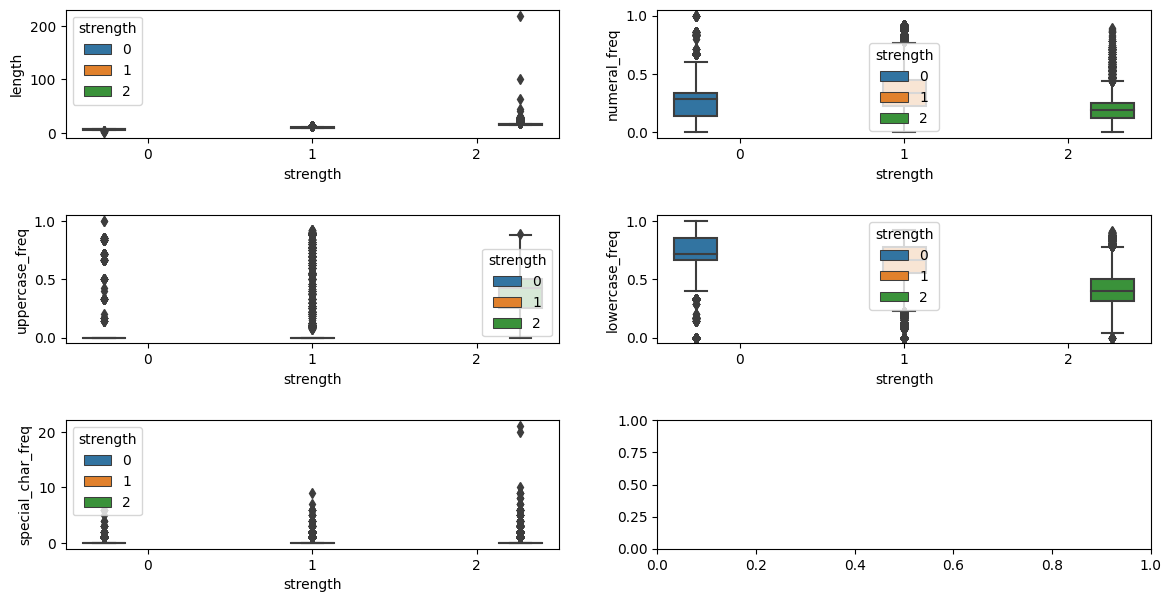

In [36]:
fig , ( (ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(14,7))

sns.boxplot(x='strength',y='length',ax=ax1,hue='strength',data=df)

sns.boxplot(x='strength',y='numeral_freq',ax=ax2,hue='strength',data=df)

sns.boxplot(x='strength',y='uppercase_freq',ax=ax3,hue='strength',data=df)

sns.boxplot(x='strength',y='lowercase_freq',ax=ax4,hue='strength',data=df)

sns.boxplot(x='strength',y='special_char_freq',ax=ax5,hue='strength',data=df)

plt.subplots_adjust(hspace=0.6)

In [51]:
def get_data(data,feature):
  plt.figure(figsize=(7,5))
  plt.subplot(1,2,1)
  plt.violinplot(x='strength',y=feature,data=df)
  plt.subplot(1,2,2)
  sns.distplot(df[df['strength']==0][feature],color="yellow",label="0",hist=False)
  sns.distplot(df[df['strength']==1][feature], color="blue", label="1", hist=False)
  sns.distplot(df[df['strength']==2][feature], color="red", label="2", hist=False)
  plt.legend()
  plt.show()

In [39]:
df.columns

Index(['password', 'strength', 'uppercase_freq', 'lowercase_freq',
       'numeral_freq', 'special_char_freq', 'length'],
      dtype='object')

In [59]:
def get_data(data,feature):
  plt.figure(figsize=(7,5))

  plt.subplot(1,2,1)

  sns.violinplot(x='strength',y=feature,data=data)

  plt.subplot(1,2,2)

  sns.distplot(data[data['strength']==0][feature],color="yellow",label="0",hist=False)
  sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
  sns.distplot(data[data['strength']==2][feature], color="red", label="2", hist=False)
  plt.legend()
  plt.show()

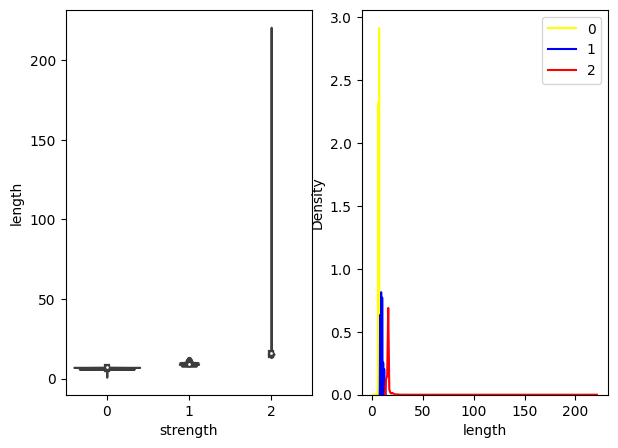

In [60]:
get_data(df,'length')

In [45]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

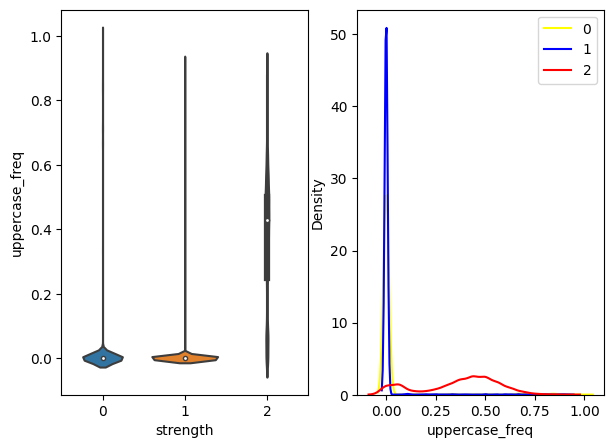

In [61]:
get_data(df,'uppercase_freq')

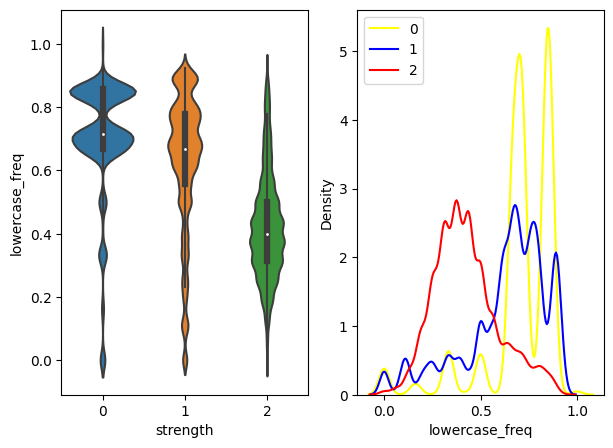

In [63]:
get_data(df,'lowercase_freq')

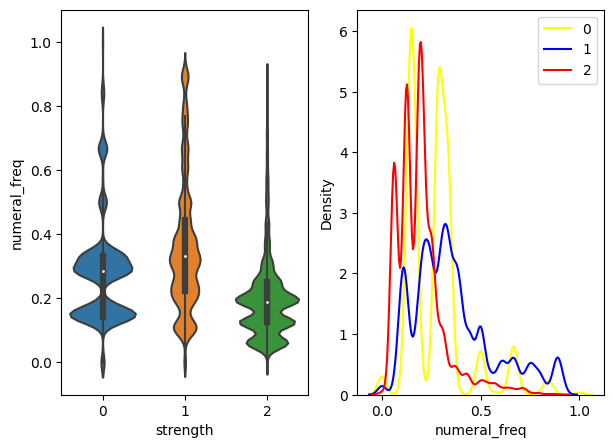

In [64]:
get_data(df,'numeral_freq')

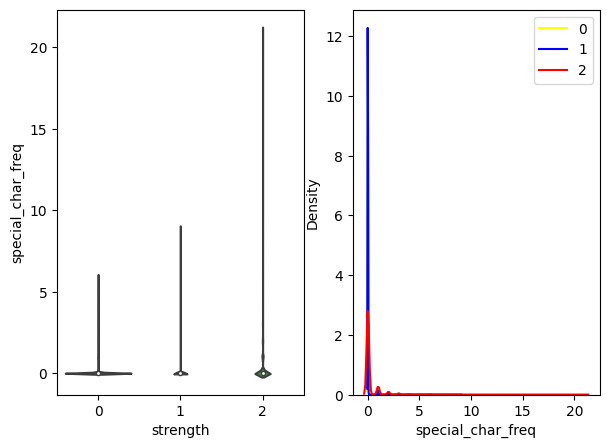

In [65]:
get_data(df,'special_char_freq')

In [66]:
df1=df.sample(frac=1)

In [67]:
x = list(df1["password"])

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer="char")

X = vectorizer.fit_transform(x)



In [69]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [71]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df2["length"] = df1['length']
df2["lowercase_freq"] = df1['lowercase_freq']
y = df1["strength"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

X_train.shape
y_train.shape

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
from collections import Counter
Counter(y_pred)

Counter({1: 16808, 0: 1421, 2: 1771})

In [74]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [75]:
predict()

Enter a password : Jeevith@7845$


'password is strong'